In [1]:
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base_6_unida_1000_a2.csv", delimiter=';')
X = dataset_process.loc[: , dataset_process.columns != 'failure'].values
y = dataset_process["failure"].values

len(dataset_process.columns)

3

In [2]:
display(dataset_process)

,a2,load,failure
0,3.915708,0,0
1,3.743655,0,0
2,4.248774,0,0
3,4.159701,0,0
4,4.168643,0,0
...,...,...,...
2004,5.057932,90,1
2005,4.576745,90,1
2006,4.857237,90,1
2007,4.998180,90,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
len(X_train)

1607

In [12]:
len(X_test)

402

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [24]:
knn.score(X_test, y_test)

0.6094527363184079

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[123,  76],
       [ 81, 122]], dtype=int64)

Text(42.0, 0.5, 'Truth')

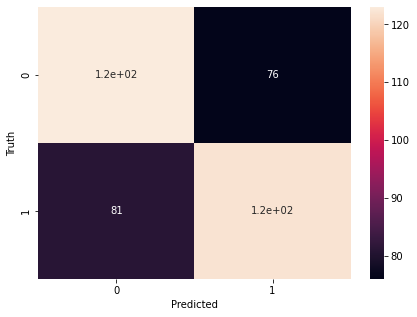

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       199
           1       0.62      0.60      0.61       203

    accuracy                           0.61       402
   macro avg       0.61      0.61      0.61       402
weighted avg       0.61      0.61      0.61       402



In [28]:
knn.predict([[-1.2,30]])

array([1], dtype=int64)

In [29]:
df0 = dataset_process[:1009]
df1 = dataset_process[1009:]


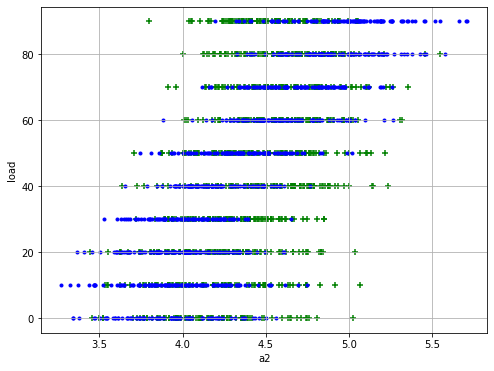

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#plt.scatter(X[:,0],X[:,2])
plt.scatter(df0['a2'], df0['load'],color="green",marker='+')
plt.scatter(df1['a2'], df1['load'],color="blue",marker='.')
plt.ylabel('load')
plt.xlabel('a2')
plt.grid()
